In [ ]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

Pick a function $F: [-1,1] \to \mathbb{R}$.

In [ ]:
F = lambda x: np.cos(2*x+1)
# F = lambda x: np.cos(8*x+1)
# F = lambda x: np.abs(x)
# F = lambda x: 1/(x-np.sqrt(2))
# F = lambda x: np.tan(np.power(x, 2))

We compare polynomial interpolation in the monomial basis (evaluated naively), and polynomial interpolation in the Lagrange basis (evaluated using the Barycentric interpolation formula), of the function $F$, for various orders of approximation. The Chebyshev nodes are used as the collocation points. 

Note that the evaluation of the interpolating polynomial using the Barycentric interpolation formula is accurate up to machine precision. On the other hand, the monomial basis is known to be extremely ill-conditioned over $[-1, 1]$. As a result, it has been shown that the condition number of the Vandermonde matrix grows at least exponentially fast, from which it follows that the monomial coefficients computed by solving the Vandermonde system are highly inaccurate. Let's check how does polynomial interpolation in the monomial basis behave in practice.

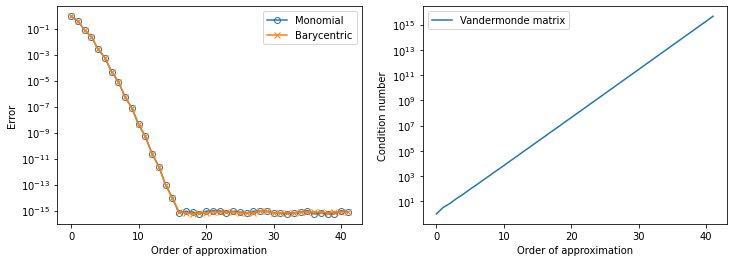

In [ ]:
xx = np.linspace(-1, 1, 10000)
sol = F(xx)

err_mono_lst = []
err_bary_lst = []

vand_cond_lst = []

# The value of N shouldn't be higher than 42. See Section 2.3 of [1] for the explanation.
N = 42

for ord in range(N):

  # Construction of collocation points
  npts = ord + 1
  ii = np.arange(0, npts+1, dtype=np.float64)
  cheb_pts = np.flip(np.cos(np.pi*ii/npts))
  f = F(cheb_pts)

  # Polynomial interpolation in the monomial basis
  V = np.vander(cheb_pts, increasing=True)
  a = np.linalg.solve(V, f)
  est_mono = np.polynomial.polynomial.polyval(xx, a)
  err_mono_lst.append(np.linalg.norm(np.abs(est_mono - sol), np.inf))

  vand_cond_lst.append(np.linalg.cond(V))

  # Polynomial interpolation in the Lagrange polynomial basis
  est_bary = interpolate.barycentric_interpolate(cheb_pts, f, xx)
  err_bary_lst.append(np.linalg.norm(np.abs(est_bary - sol), np.inf))

# Visualize the approximation errors, and the condition number of the Vandermonde matrix V
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].semilogy(np.arange(N), err_mono_lst, "o-", fillstyle = 'none')
ax[0].semilogy(np.arange(N), err_bary_lst, "x-")

ax[0].legend(['Monomial', 'Barycentric'])
ax[0].set(xlabel="Order of approximation", ylabel="Error")

ax[1].semilogy(np.arange(N), vand_cond_lst, "-")
ax[1].legend(['Vandermonde matrix'])
ax[1].set(xlabel="Order of approximation", ylabel="Condition number")

plt.show()

According to the experimental results, polynomial interpolation in the monomial basis is, surprisingly, as accurate as polynomial interpolation in a more well-conditioned basis in many cases. We note that the most standard linear system solver (i.e., 
LU decomposition with partial pivoting) is used to solve the Vandermonde system for computing the monomial coefficients.


In our recent work [1], we present

*   the explanation for this phenomenon,
*   a comprehensive guide for polynomial interpolation in the monomial basis,
*   and a number of its applications.

Note that our theory is applicable to functions defined on any smooth simple arc in the complex plane.

**References**

[1] Zewen Shen and Kirill Serkh. “Polynomial interpolation in the monomial basis is stable after all.” (2022). [arxiv](https://arxiv.org/abs/2212.10519)